In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Drug_Classification.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.describe(include=['object'])

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,DrugY
freq,104,77,103,91


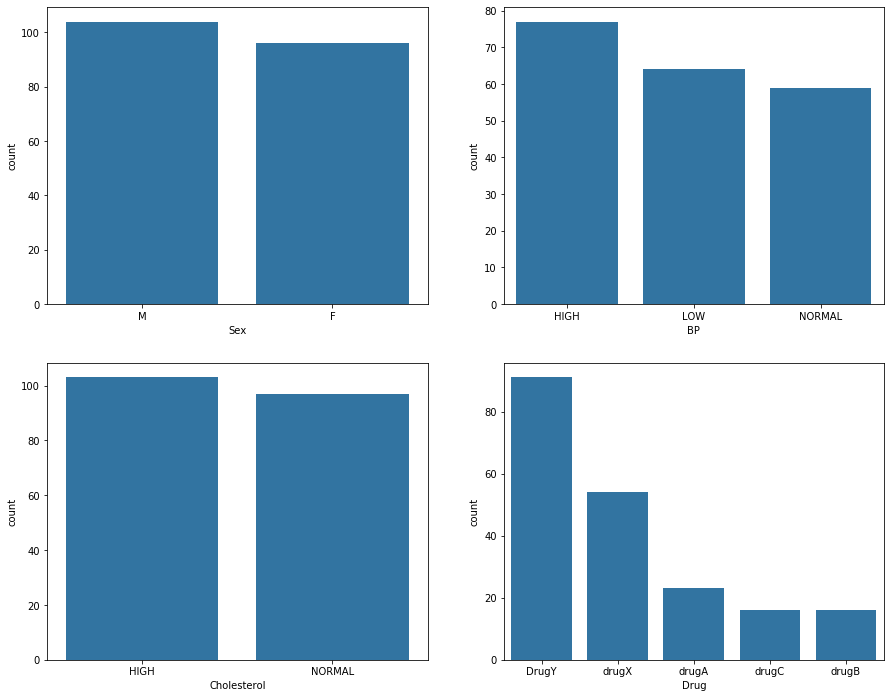

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))
for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    #print (i, column)
    sns.countplot(data = df, x = column, color = 'tab:blue', order=df[column].value_counts().index, ax=axes[i//2,i%2])

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


0 Age
1 Na_to_K


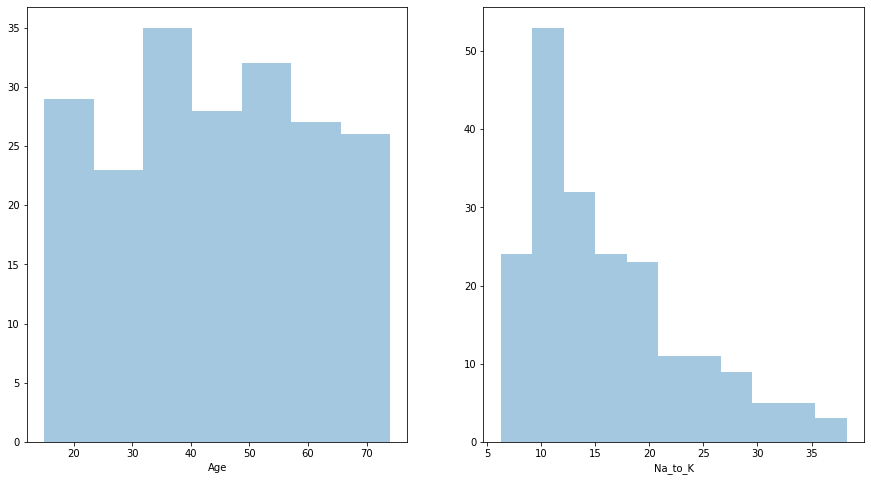

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))
for i, column in enumerate(df.select_dtypes(include=['int64','float64']).columns):
    print (i, column)
    sns.distplot(df[column],ax=axes[i%2], kde=False)

In [9]:
for column in df.select_dtypes(include=['object']).columns:
    print(column)
    print(df[column].unique())
    print("")

Sex
['F' 'M']

BP
['HIGH' 'LOW' 'NORMAL']

Cholesterol
['HIGH' 'NORMAL']

Drug
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']



In [10]:
df["Sex"] = df["Sex"].map({"M": 0, "F":1})
df["BP"] = df["BP"].map({"HIGH" : 3, "NORMAL" : 2, "LOW": 1})
df["Cholesterol"] = df["Cholesterol"].map({"HIGH": 1, "NORMAL" : 0})
df["Drug"] = df["Drug"].map({"DrugY": 0, "drugC": 1, "drugX": 2, "drugA":3, "drugB":4})

In [11]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,3,1,25.355,0
1,47,0,1,1,13.093,1
2,47,0,1,1,10.114,1
3,28,1,2,1,7.798,2
4,61,1,1,1,18.043,0
...,...,...,...,...,...,...
195,56,1,1,1,11.567,1
196,16,0,1,1,12.006,1
197,52,0,2,1,9.894,2
198,23,0,2,0,14.020,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [13]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,1,3,1,25.355
1,47,0,1,1,13.093
2,47,0,1,1,10.114
3,28,1,2,1,7.798
4,61,1,1,1,18.043
...,...,...,...,...,...
195,56,1,1,1,11.567
196,16,0,1,1,12.006
197,52,0,2,1,9.894
198,23,0,2,0,14.020


In [15]:
y

0      0
1      1
2      1
3      2
4      0
      ..
195    1
196    1
197    2
198    2
199    2
Name: Drug, Length: 200, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
79,32,1,1,0,10.840
197,52,0,2,1,9.894
38,39,1,2,0,9.709
24,33,1,1,1,33.486
122,34,0,2,1,22.456
...,...,...,...,...,...
106,22,0,2,1,11.953
14,50,1,2,1,12.703
92,29,1,3,1,29.450
179,67,1,2,1,15.891


In [19]:
y_train

79     2
197    2
38     2
24     0
122    0
      ..
106    2
14     2
92     0
179    0
102    1
Name: Drug, Length: 160, dtype: int64

In [20]:
from xgboost import XGBClassifier

In [21]:
model = XGBClassifier()

In [22]:
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
y_pred = model.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
accuracy_score(y_test, y_pred)

0.975

In [26]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0,  0,  0],
       [ 0,  4,  1,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

In [27]:
y_pred

array([2, 0, 2, 1, 0, 0, 0, 2, 3, 2, 3, 2, 0, 3, 4, 0, 4, 2, 1, 0, 4, 2,
       2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 3, 0, 2, 3, 0, 3], dtype=int64)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier()

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:
y_pred = model.predict(x_test)

In [32]:
accuracy_score(y_test, y_pred)

1.0

In [33]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model = DecisionTreeClassifier()

In [36]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [37]:
y_pred = model.predict(x_test)

In [38]:
accuracy_score(y_test, y_pred)

1.0

In [39]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  0, 11,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
model = KNeighborsClassifier()

In [42]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
y_pred = model.predict(x_test)

In [44]:
accuracy_score(y_test, y_pred)

0.725

In [45]:
confusion_matrix(y_test, y_pred)

array([[15,  0,  0,  0,  0],
       [ 0,  1,  4,  0,  0],
       [ 1,  0,  9,  1,  0],
       [ 0,  0,  3,  3,  0],
       [ 0,  0,  2,  0,  1]], dtype=int64)